In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 简单单隐藏层前馈神经网络

In [2]:
from pywander.neural_network import load_mnist_csv_data

train_data = load_mnist_csv_data('mnist_dataset/mnist_train.csv')
test_data = load_mnist_csv_data('mnist_dataset/mnist_test.csv')



[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.  

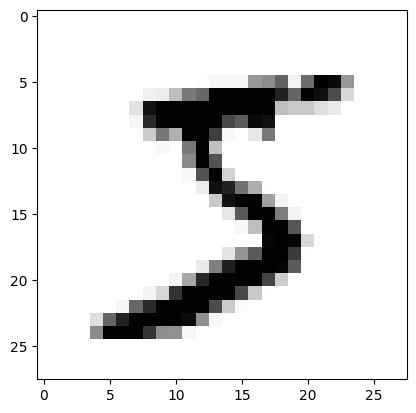

In [4]:
lable = train_data[0][0]
image_data = train_data[0][1]
image_data = image_data.reshape((28,28))
print(image_data)
plt.imshow(image_data, cmap='Greys')

In [6]:
from pywander.neural_network import SimpleFNN
epochs = 5
learning_rate = 0.2 / epochs

nn = SimpleFNN(input_nodes=28 * 28, output_nodes=10, hidden_nodes=100, learning_rate=learning_rate)
label_list = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
nn.set_label_list(label_list)

score_card = []

for e in range(epochs):
    for label, value in train_data:
        nn.train(value, label)

    print(f'epoch {e} finished....')

for label, value in test_data:
    result_label = nn.query_label(value)

    if label == result_label:
        score_card.append(1)
    else:
        score_card.append(0)

score_card = np.asarray(score_card)
print(score_card.sum() / score_card.size)
print('################################################')


epoch 0 finished....
epoch 1 finished....
epoch 2 finished....
epoch 3 finished....
epoch 4 finished....
0.9683
################################################
